# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './data/train.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print('train shape ', X_train.shape, ' label shape ', y_train.shape)

train shape  (39209, 32, 32, 3)  label shape  (39209,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np

# TODO: Number of training examples
n_train = train['features'].shape[0]

# TODO: Number of testing examples.
n_test = test['features'].shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = [train['features'].shape[1], train['features'].shape[2]]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(train['labels']).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = [32, 32]
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

selected  {0: 179, 1: 2012, 2: 3408, 3: 5593, 4: 6369, 5: 8081, 6: 10060, 7: 10937, 8: 13071, 9: 14401, 10: 15543, 11: 17212, 12: 18580, 13: 20485, 14: 22969, 15: 23115, 16: 23741, 17: 24385, 18: 25655, 19: 26599, 20: 26631, 21: 27159, 22: 27456, 23: 27932, 24: 28368, 25: 29765, 26: 30460, 27: 30763, 28: 30811, 29: 31362, 30: 31845, 31: 32169, 32: 32943, 33: 33323, 34: 34126, 35: 34405, 36: 35788, 37: 35935, 38: 37901, 39: 38093, 40: 38394, 41: 38900, 42: 39006}


/home/carnd/anaconda3/envs/CarND-LeNet-Lab/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


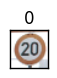

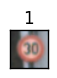

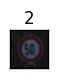

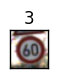

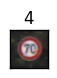

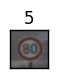

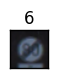

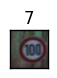

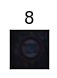

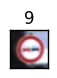

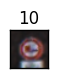

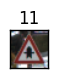

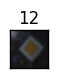

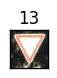

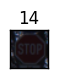

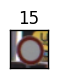

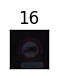

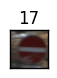

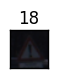

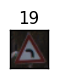

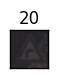

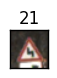

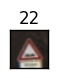

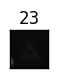

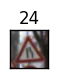

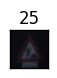

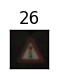

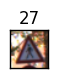

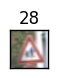

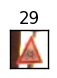

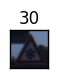

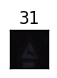

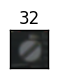

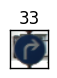

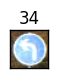

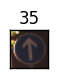

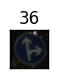

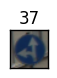

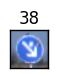

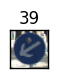

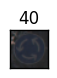

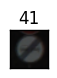

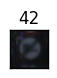

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
unq, unq_idx, unq_cnt = np.unique(y_train, return_inverse=True, return_counts=True)

selected = dict()
for j in range(len(unq)):
    indices = np.random.choice(np.where(unq_idx==j)[0], 1)
    selected[j] = indices[0]
print('selected ', selected)
idx = 1
for k, s in selected.items():
    fig = plt.figure()
    sub = fig.add_subplot(7,7,idx)
    plt.imshow(train['features'][s])
    sub.set_title(str(k)), plt.xticks([]), plt.yticks([])
    idx += 1
    if(idx > 43):
        break

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
labels, counts = np.unique(y_train, return_counts=True)
print('original labels ', labels)
print('original label counts ', counts)

# shuffle the dataset
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)



original labels  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
original label counts  [ 210 2220 2250 1410 1980 1860  420 1440 1410 1470 2010 1320 2100 2160  780
  630  420 1110 1200  210  360  330  390  510  270 1500  600  240  540  270
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]


In [5]:
# The dataset is not balanced. To balance the dataset oversample the labels which
# are under-represented

def balance(X_train, y_train):
    
    unq, unq_idx, unq_cnt = np.unique(y_train, return_inverse=True, return_counts=True)
    cnt = np.max(unq_cnt)
    
    #create an empty array with balanced sample size
    out_train = np.empty((cnt*len(unq),) + X_train.shape[1:], X_train.dtype)
    out_label = np.empty((cnt*len(unq),) + y_train.shape[1:], y_train.dtype)
    
    print('out_train shape ', out_train.shape, ' out_label ', out_label.shape)
    
    for j in range(len(unq)):
        indices = np.random.choice(np.where(unq_idx==j)[0], cnt)
        out_train[j*cnt:(j+1)*cnt] = X_train[indices]
        out_label[j*cnt:(j+1)*cnt] = y_train[indices]
    return out_train, out_label

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** The following pre-processing is done
1. Shuffle the data
Shuffling ensures that training and validation sets have a good mix of labels.
2. Balance the data
The training data set is quite unbalanced, there is a 10x difference among some labels. I used over sampling for balancing the under represented labels.


In [6]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split

TEST_FRACTION = 0.33
RANDOM_S = 71
BATCH_SIZE = 32

X_train_bal, y_train_bal = balance(X_train, y_train)
print('balanaced train shape ', X_train_bal.shape, ' label shape ', y_train_bal.shape)

labels, counts = np.unique(y_train_bal, return_counts=True)
print('balanced labels ', labels)
print('balanced label counts ', counts)

X_train = X_train_bal
y_train = y_train_bal

#split the training data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=TEST_FRACTION, random_state=RANDOM_S)
print('X_train shape ', X_train.shape, ' X_valid shape ', X_validation.shape)


out_train shape  (96750, 32, 32, 3)  out_label  (96750,)
balanaced train shape  (96750, 32, 32, 3)  label shape  (96750,)
balanced labels  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
balanced label counts  [2250 2250 2250 2250 2250 2250 2250 2250 2250 2250 2250 2250 2250 2250 2250
 2250 2250 2250 2250 2250 2250 2250 2250 2250 2250 2250 2250 2250 2250 2250
 2250 2250 2250 2250 2250 2250 2250 2250 2250 2250 2250 2250 2250]
X_train shape  (64822, 32, 32, 3)  X_valid shape  (31928, 32, 32, 3)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
The given dataset contains a training set and a test set. I split the training set into two parts - 66% for training and 33% for validation.


In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

keep_prob = tf.placeholder(tf.float32)

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x16.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 16), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(16))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    conv1 = tf.nn.dropout(conv1, keep_prob)


    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x16. Output = 14x14x16.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.dropout(conv2, keep_prob)
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x32. Output = 5x5x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x32. Output = 800.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 800. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits, fc3_W, fc3_b

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** 
My architecture is based on the LeNet5 design, which has the following components
 1. Convolution layer 1 (input 32x32x3, output 28x28x16)
     Dropout
     Relu activation
 2. Max Pooling         (input 28x28x16, output 14x14x16)
 3. Convolution layer 2 (input 14x14x16, output 10x10x32)
     Dropout
     Relu activation
 4. Max pooling         (input 10x10x32, output 5x5x32)
    Flatten             (input 5x5x32, output 800)
 5. Fully connected 1   (input 800, output 120)
    Relu activation
 6. Fully connected 2   (input 120, output 84)
    Relu activation
 7. Fully connected 3   (input 84, output 43)

In [8]:
### Train your model here.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

LEARN_RATE = 0.0001
EPOCHS = 100


logits, fc_W, fc_b = LeNet(x)
#logits = tf.nn.dropout(logits, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)

#L2 regularization
#loss_operation = tf.reduce_mean(.0005 * tf.nn.l2_loss(fc_W) + loss_operation)

optimizer = tf.train.AdamOptimizer(learning_rate = LEARN_RATE)
training_operation = optimizer.minimize(loss_operation)



In [9]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, batch_size):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [10]:
train = False

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    if(train == True):

        num_examples = len(X_train)
    
        print("Training...")
    
        for i in range(EPOCHS):

            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.65})

            validation_accuracy = evaluate(X_validation, y_validation, BATCH_SIZE)
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
        
        saver.save(sess, 'lenet')
        print("Model saved")
    else:
        saver = tf.train.import_meta_graph('lenet.meta')
        saver.restore(sess, tf.train.latest_checkpoint('./'))


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
I tried training the models with various setting, the following settings produced the best results.
Optimizer - AdamOptimizer
Batch size - 128
Epochs - 100
Learning rate - 0.0001


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I started with the standard LeNet5 architecture. LeNet5 introduced in one of lectures produced high accuracy for the MNIST digit recognition problem. Since the traffic sign recognition problem is similar to the digit recognition problem I decided to start with LeNet 5. I made the following modifications

1. Increase the network size to accomodate for the 3 channels in the input images
2. Introduce dropout after the convolution layers.

I had to experiment with many variations before I got the best performing configuration. Here is the list of various configurations that I tried and the accuracy I got for each one.

 Epochs  Learning rate   L2 Regularization       Dropout         Accuracy

1. 100     0.0001          none                    none             94.4
2. 100     0.0001          0.001                   none             96.8
3. 200     0.0001          0.001                   none             96.9
4. 200     0.0001          none                    0.75             98.7
5. 200     0.0001          none                    0.65             98.9
6. 200     0.0001          none                    0.50             93.8

With dataset balancing

7. 100     0.0001          none                    0.65             99.6
8. 200     0.0001          none                    0.65             99.8

Test set accuracy with the final model - 94.5

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [11]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.



In [12]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test, BATCH_SIZE)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print('X_test ', X_test.shape, ' y_test ', y_test.shape)

Test Accuracy = 0.945
X_test  (12630, 32, 32, 3)  y_test  (12630,)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

y_data  (7,)
X_data  (7, 32, 32, 3)
predictions  [ 3 13  1 12 40  9 11]
Test Accuracy = 0.714


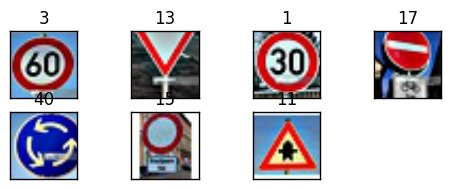

In [13]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
import os, glob
import matplotlib.image as mpimg
import cv2

dirname = './test_signs2_thumb'
idx=441
X_data = []
y_data = []

for f in glob.glob(os.path.join(dirname, "*") ):
    label = ((os.path.basename(f)).split('.'))[0]
    
    img = cv2.imread(f)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(rgb_img, (32, 32))
    plt.subplot(idx),plt.imshow(resized)
    plt.title(label), plt.xticks([]), plt.yticks([])
    X_data.append(resized)
    y_data.append(int(label))
    idx += 1

X_data = np.array(X_data, dtype=float)
y_data = np.array(y_data)

print('y_data ', y_data.shape)
print('X_data ', X_data.shape)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    prediction = tf.argmax(logits, 1)
    print ('predictions ', prediction.eval(feed_dict={x: X_data, keep_prob: 1.}, session=sess))
  
    test_accuracy = evaluate(X_data, y_data, 1)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** The model does well on images that are centered, it does not do too good where either the images are not centered or there are objects other than the traffic sign in the image.

In [14]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    probs = tf.nn.top_k(logits, k=5)
    print('probabilites: ', sess.run(probs, feed_dict={x: X_data, keep_prob: 1.}))


probabilites:  TopKV2(values=array([[  63.55901718,   48.73600769,   40.24779129,   -2.87247181,
         -30.79562759],
       [   4.82137489,  -21.64383507,  -24.5637722 ,  -42.42024231,
         -43.28676224],
       [ 102.6363678 ,   85.854599  ,   44.06874847,   23.24014282,
          16.53500175],
       [  41.35313797,  -24.70804596,  -64.40488434,  -74.07987976,
         -78.43955231],
       [  -1.49552989,  -57.29608154,  -70.45741272,  -94.66395569,
        -100.6697464 ],
       [  77.05961609,   54.59514618,   42.27810669,   40.5354805 ,
          12.50871277],
       [  55.28716278,   48.34283066,  -75.9964447 , -101.26244354,
        -122.09526062]], dtype=float32), indices=array([[ 3,  5,  2,  1, 10],
       [13, 12,  3, 10, 29],
       [ 1,  2,  5,  4,  8],
       [12, 10,  9, 42,  7],
       [40, 18,  5,  8,  7],
       [ 9, 13, 41, 12, 35],
       [11, 30, 28, 25, 21]], dtype=int32))


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
For the correct predictions the model is quite confident. Of the 2 wrong predictions, for one the correct prediction is on the second place. For the other one the correct prediction is not it top 5.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.